Обучение без учителя преследует за собой две основные задачи:

- сжатие размерности

- кластеризация

- поиск аномалий

# Сжатие размерности

## PCA - метод главных компонент

### Сингулярное разложение

Неотрицательное вещественное число $\sigma$  называется *сингулярным числом* матрицы $X$ тогда и только тогда, когда существуют два вектора единичной длины $u \in K^{m}$ и $ v \in K^{n}$ такие, что:

$$Xv = \sigma u$$

$$ X^Tu = \sigma v $$

Здесь $u$ и $v$  - левый сингулярный вектор и правый сингулярный вектор, соответствующимие сингулярному числу $\sigma$.

Стоит отличать сингулярное значение от собственных векторов и чисел. Напомним, что собственный вектор с соответствующим ему собственным значением находится из уравнения:

$$Xv = wv$$

*Сингулярным разложением* матрицы $X$ называется представление её в виде $X = U\Sigma V^T$, где:

 - $\Sigma$ есть $m\times n$ матрица у которой элементы, лежащие на главной диагонали, неотрицательны, а все остальные элементы равны нулю.
 - $U$ и $V$ – ортогональные матрицы порядка $m$  и $n$ соответственно.

Напомним, что ортогональная матрица - это матрица, для которой выполняется: $$A A^T = A^T A = E$$

Сингулярное разложение является удобным методом при работе с матрицами. Оно показывает геометрическую структуру матрицы и позволяет наглядно представить имеющиеся данные. Сингулярное разложение используется при решении самых разных задач — от приближения методом наименьших квадратов и решения систем уравнений до сжатия изображений. При этом используются разные свойства сингулярного разложения, например, способность показывать ранг матрицы, приближать матрицы данного ранга. SVD позволяет вычислять обратные и псевдообратные матрицы большого размера, что делает его полезным инструментом при решении задач регрессионного анализа.

 
Рассмотрим более подробно задачу о сингулярном разложении матрицы $X \in \mathbb{R}^{m \times n}$.
 
Элементы главной диагонали матрицы $D$ называются *сингулярными числами* матрицы $X$, а столбцы $U$ и $V$ левыми и правыми *сингулярными векторами* матрицы $X$.

Заметим, что матрицы $XX^T$ и $X^TX$ являются симметрическими неотрицательно определенными матрицами, и поэтому ортогональным преобразованием могут быть приведены к диагональному виду, причем на диагонали будут стоять неотрицательные собственные значения этих матриц.

В силу указанных выше свойств матриц $X^TX$ и $XX^T$ сингулярное разложение матрицы $X$ тесно связано с задачей о спектральном разложении этих матриц. Более точно:
- Левые сингулярные векторы матрицы $X$ (составляют матрицу U)– это собственные векторы матрицы $XX^T$.
- Правые сингулярные векторы матрицы $X$ (составляют матрицу V) – это собственные векторы матрицы $X^TX$.
- Сингулярные числа матрицы $X$ - это корни из собственных значений матрицы $X^TX$ (или $XX^T$).

Таким образом, для нахождения сингулярного разложения матрицы $X$ необходимо, найти собственные векторы и значения матриц $X^TX$ и $XX^T$
и составить из них матрицы $U, V, \Sigma$.

Cингулярное разложение можно переформулировать в геометрических терминах. Линейный оператор, отображающий элементы пространства $R^n$ в себя представим в виде последовательно выполняемых линейных операторов *вращения*, *растяжения* и *вращения*. Поэтому компоненты сингулярного разложения наглядно показывают геометрические изменения при отображении линейным оператором A множества векторов из векторного пространства в себя или в векторное пространство другой размерности.

![Графическая интерпретация сингулярного уравнения](https://miro.medium.com/max/700/1*6wkgGgBy2NLVmRVOw8K86w.png)


In [1]:
import numpy as np
from scipy.linalg import svd
# define a matrix
X = np.array([[1, 2], [3, 4], [5, 6]])
print(X)
# SVD
U, s, VT = svd(X)
print(U)
print(s)
print(VT.T)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [10]:
# Проверим написанные нами выше формулы
w_left, v_left = np.linalg.eig(X @ X.T)
print(v_left)  # - матрица U
w_right, v_right = np.linalg.eig(X.T @ X)
print(v_right)

print(f"Собственные значения X XT: {w_left}")

print(f"Собственные значения XT X: {w_right}")

print(f"Сингулярные числа: {s}")


[[-0.2298477  -0.88346102  0.40824829]
 [-0.52474482 -0.24078249 -0.81649658]
 [-0.81964194  0.40189603  0.40824829]]
[[-0.78489445 -0.61962948]
 [ 0.61962948 -0.78489445]]
Собственные значения X XT: [9.07354949e+01 2.64505087e-01 7.62118971e-19]
Собственные значения XT X: [ 0.26450509 90.73549491]
Сингулярные числа: [9.52551809 0.51430058]


### Идея и реализация метода PCA

Основная идея метода главных компонент заключается в нахождении таких попарно ортогональных направлений в исходном многомерном пространстве (признаковом), вдоль которых данные имеют наибольший разброс (выборочную дисперсию). Эти направления называются главными компонентами. 

Другая формулировка PCA – для данной многомерной случайной величины построить такое ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль. Таким образом, задача сводится к диагонализации матрицы ковариаций, что эквивалентно нахождению сингулярного разложения матрицы исходных данных.

**Алгоритм**:

1. Определить $k<n$ – новую размерность (k - компонент, n - исходное количество признаков)
2. Нормализовать данные:
 - Вычесть из $X$ среднее, то есть заменить все $\Large x^{(i)}$  на $$\Large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$$
 - Привести данные к единичной дисперсии: посчитать $$\Large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$$
и заменить $\Large x_j^{(i)}$ на $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
3. Найти сингулярное разложение матрицы $X$:
$$\Large X = UDV^T$$
4. Положить $V =$ [$k$ левых столбцов матрицы $V$]
5. Вернуть новую матрицу $$\Large Z = XV \in \mathbb{R}^{m \times k}$$

### Пример реализации

         0        1
0  1.00000  0.72794
1  0.72794  1.00000
Proportion of variance explained by each component:
1st component - 0.86,
2nd component - 0.14

Directions of principal components:
1st component: [-0.70710678 -0.70710678] 
2nd component: [ 0.70710678 -0.70710678]


/tmp/ipykernel_173925/2268388242.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 300)


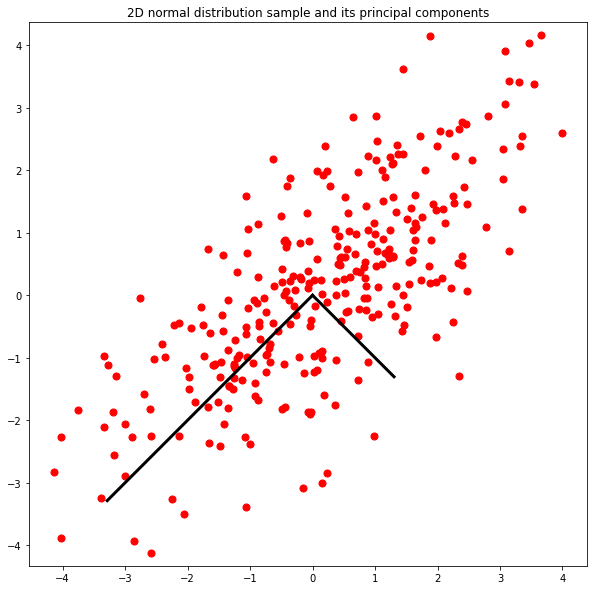

In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, 0],
                [3, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)
print(pd.DataFrame(X).corr())

pca = PCA()
X_scal = (X - X.mean(axis=0))/X.std(axis=0)
pca.fit(X_scal)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

In [17]:
# Реализация через SVD

U, s, Vh = svd(X_scal, full_matrices=False)
n_comp = 2
Z1 = U[:, :n_comp] * s[:n_comp]
Z2 = X_scal @ Vh.T
Z1[:10]
print(np.allclose(Z1, Z2))
print(Z1[:10])

True
[[-2.39391923 -0.2379597 ]
 [-1.32549283 -1.19598883]
 [-2.56391328  0.48298728]
 [-1.34974072  0.05785287]
 [ 0.03426888 -0.2278214 ]
 [-0.26040354 -0.77680162]
 [-1.09690847 -0.0836428 ]
 [-0.67905225 -0.19208454]
 [-2.05844776  0.08149844]
 [-0.53952029  0.43143165]]


In [15]:
pca = PCA()
pca.fit(X_scal)
pca.transform(X_scal)[:10]

array([[ 2.44128851, -0.21067116],
       [ 1.16959833, -0.86356126],
       [ 2.7409139 ,  0.29221327],
       [ 1.40930884,  0.01598501],
       [-0.07451705, -0.15926773],
       [ 0.13705155, -0.54993519],
       [ 1.12295867, -0.07871   ],
       [ 0.67116851, -0.14719675],
       [ 2.14814135,  0.01965407],
       [ 0.63320459,  0.29295295]])

Заметим, что знаки не совпадают. SVD страдает от проблемы, называемой "неопределенностью знака",
которая означает, что знак компонент и преобразованные данные зависят от алгоритма и случайного состояния. Для решения
этой проблемы мы можем раскладывать не по всем векторам, а по зараннее выбранным (например, как в PCA - выбрать
зараннее известное количество компонент): $ X_k = \sum_{i=1}^k \sigma_i u_i v_i $ вместо
$ X_n = \sum_{i=1}^n \sigma_i u_i v_i $. Этот метод называется усеченным SVD (truncated SVD).



In [18]:
from sklearn.decomposition import TruncatedSVD
svd_trunc = TruncatedSVD(n_components=1)
svd_trunc.fit(X_scal)
result = svd_trunc.transform(X_scal)
print(result[:10])

[[ 2.39391923]
 [ 1.32549283]
 [ 2.56391328]
 [ 1.34974072]
 [-0.03426888]
 [ 0.26040354]
 [ 1.09690847]
 [ 0.67905225]
 [ 2.05844776]
 [ 0.53952029]]


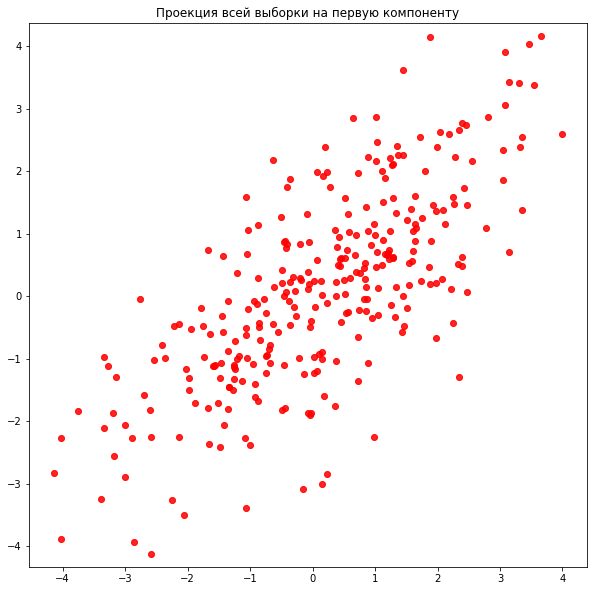

In [19]:
# Оставим столько компонент, сколько нужно для объяснения по крайней мере 90% вариации
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Преобразуем сниженные данные в изначальное признаковое пространство
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Проекция всей выборки на первую компоненту')
plt.show()

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты.
В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных
с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

## PCR - Principal component regression (регрессия на главные компоненты)

PCR обычно используют в ситуациях, когда число факторов велико, а число наблюдений мало. В этом случае число степеней
свободы будет стремиться к нулю, что плохо скажется на результатах. Помимо этого, PCR хорошо заходит в моделях,
где факторы сильно коррелируют друг с другом.

Пусть $Z_m$ - векторы новой размерности $m$, которые представлены через линейную комбинацию исходных векторов:  
$$Z_m = \sum_{j=1}^p \phi_{jm}X_j$$

где $\phi_{jm}$ - вес фактора $j$ в компоненту $m$ согласно методу PCA

Тогда после вычисления МНК-оценок данных векторов на целевую переменную, коэффициенты для исходных факторов находятся по такой формуле:

$$\beta_j = \sum_{m=1}^M \theta_m \phi_{jm}$$

где $\theta_m$ - МНК оценка компоненты $m$ в линейной регрессии.

Алгоритм метода PCR:

1. Находим $m$ главных компонент из признакового пространства размерности $p$

2. Строим регрессию зависимой переменной на эти главные компоненты.

3. Полученные коэффициенты матрично перемножаем с весами, с которыми каждая исходная переменная входит в компоненту.

4. Интерпретируем результаты. Поскольку все переменные стандартизированные, веса коэффициентов можно сравнивать друг с другом.

Количество компонент в данном случае - гиперпараметр, который мы настраиваем при помощи кросс-валидации.

In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

credit = pd.read_csv("/Users/iakubovskii/Machine_Learning/RANEPA/Fintech_2020/Машинное обучение/Данные/Credit.csv")
credit.set_index("ID", inplace=True)
credit.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/iakubovskii/Machine_Learning/RANEPA/Fintech_2020/Машинное обучение/Данные/Credit.csv'

In [95]:
qual_cols = ['Gender', 'Student', 'Married', 'Ethnicity']
credit_reg = credit.drop(qual_cols, axis=1).join(
    pd.get_dummies(credit[qual_cols], drop_first=True))
X_reg, y_reg = credit_reg.drop("Balance", axis=1), credit_reg['Balance']
sc = StandardScaler()
X_reg_scal, y_reg_scal = sc.fit_transform(X_reg), sc.fit_transform(y_reg.values.reshape(-1,1))
n_pca=2
pca = PCA(n_components=n_pca).fit(X_reg_scal)
pcs = pca.fit_transform(X_reg_scal)
print(f"{n_pca} компоненты объясняют порядка \
      {np.round(np.sum(pca.explained_variance_ratio_)*100, 2)} % вариации")
X_PCR =  pcs.copy()
V = pca.components_.T
ols = sm.OLS(endog = y_reg_scal, exog = sm.add_constant(X_PCR)).fit()
print(ols.summary())
beta_Z = ols.params[1:]
beta_X = V @ beta_Z
coefs = pd.DataFrame(index = X_reg.columns, data = beta_X)
coefs.columns = ['coefs_PCR']
print(coefs)

2 компоненты объясняют порядка       39.64 % вариации
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     278.3
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           2.89e-76
Time:                        20:27:07   Log-Likelihood:                -392.33
No. Observations:                 400   AIC:                             790.7
Df Residuals:                     397   BIC:                             802.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [57]:
# Прогоним классическую регрессию со всеми переменными
col_names = ['const']
col_names.remove("const")
col_names.extend(credit_reg.drop(["Balance"], axis=1).columns)
ols_no_pcr = sm.OLS(endog=y_reg_scal, exog = X_reg_scal
                   ).fit()
print(ols_no_pcr.summary(xname=col_names))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              752.3
Date:                Mon, 07 Jun 2021   Prob (F-statistic):                   2.39e-254
Time:                        20:07:05   Log-Likelihood:                          53.095
No. Observations:                 400   AIC:                                     -84.19
Df Residuals:                     389   BIC:                                     -40.28
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [58]:
credit_reg.drop("Balance", axis=1).corr()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,-0.010738,0.019632,0.035652,-0.017137,-0.019701
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.009397,-0.006015,0.031155,-0.032427,-0.003081
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.008885,-0.002028,0.036751,-0.035999,-0.001070
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,-0.022658,-0.026164,-0.009695,0.005591,-0.005631
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.004015,-0.029844,-0.073136,-0.059623,-0.000822
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.005049,0.072085,0.048911,0.029586,-0.037725
Gender_Female,-0.010738,0.009397,0.008885,-0.022658,0.004015,-0.005049,1.000000,0.055034,0.012452,0.025425,-0.009831
Student_Yes,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,0.055034,1.000000,-0.076974,0.053534,-0.048334
Married_Yes,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,0.012452,-0.076974,1.000000,0.088595,0.011418
Ethnicity_Asian,-0.017137,-0.032427,-0.035999,0.005591,-0.059623,0.029586,0.025425,0.053534,0.088595,1.000000,-0.582131


In [61]:
# Удалим переменные, которые сильно коррелируют друг с другом
col_names = ['const']
col_names.extend(credit_reg.drop(["Balance", "Limit", "Income"], axis=1).columns)
ols_no_pcr = sm.OLS(endog=y_reg_scal, exog = sm.add_constant(np.delete(X_reg_scal, [1,2], axis=1))
                   ).fit()
print(ols_no_pcr.summary(xname=col_names))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     18.09
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.83e-25
Time:                        20:08:12   Log-Likelihood:                -497.80
No. Observations:                 400   AIC:                             1016.
Df Residuals:                     390   BIC:                             1056.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.214e-17    

In [69]:
# Проверяяем чему равен ранг матрицы (он должен быть равен числу объясняющих переменных)
np.linalg.matrix_rank(sm.add_constant(np.delete(X_reg_scal, [1,2], axis=1))) == \
sm.add_constant(np.delete(X_reg_scal, [1,2], axis=1)).shape[1]

True

In [64]:
# VIF при удалении коррелированных переменных
np.diag(np.linalg.inv(credit_reg.drop(["Balance", "Limit", "Income"], axis=1).corr().values))

array([1.01831005, 1.00798877, 1.0234839 , 1.01315709, 1.00456088,
       1.02040421, 1.03154643, 1.54637879, 1.52681452])

In [65]:
# VIF без удаления коррелированных переменных
np.diag(np.linalg.inv(credit_reg.drop(["Balance"], axis=1).corr().values))
# VIF > 5-10 - не очень хорошо! (коэффициенты будут плыть, стандартные ошибки могут быть слишком высокими)

array([  2.78618211, 234.02809952, 235.84825926,   1.44868996,
         1.05140999,   1.0195883 ,   1.00584914,   1.03151711,
         1.04463758,   1.55215669,   1.52750408])

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import category_encoders as ce

categorical_features = ['Gender', 'Student', 'Married', 'Ethnicity']
numeric_features = list(set(credit.columns) - set(categorical_features) - set(["Balance"]))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_std=True, with_mean=True))])

categorical_transformer = ce.OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
X_preprocessed = preprocessor.fit_transform(credit.drop("Balance", axis=1))
y = (credit['Balance'] - credit['Balance'].mean()) / credit['Balance'].std()

n_pca=2
pca = PCA(n_components=n_pca).fit(X_preprocessed)
pcs = pca.fit_transform(X_preprocessed)
X_PCR =  pcs.copy()
V = pca.components_.T
ols = sm.OLS(endog = y, exog = sm.add_constant(X_PCR)).fit()
print(ols.summary(xname=['const', 'PC1', "PC2"]))
beta_Z = ols.params[1:]
beta_X = V @ beta_Z
all_cols = preprocessor.transformers_[0][2].copy()  # extract num columns (0 step in pipeline)
cat_col_names = preprocessor.transformers_[1][1].get_feature_names()  # extract category columns (1 step in pipeline)
all_cols.extend(cat_col_names)
coefs = pd.DataFrame(index = all_cols, data = beta_X)
coefs.columns = ['coefs_PCR']
print(coefs)


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     277.1
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           4.68e-76
Time:                        20:26:38   Log-Likelihood:                -392.31
No. Observations:                 400   AIC:                             790.6
Df Residuals:                     397   BIC:                             802.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.725e-17      0.032   1.77e-15      1.0

/Users/iakubovskii/PythonR/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Почему коэффициенты отличаются? Ваша задача с этим разобраться. А мы пока посмотрим, как снижается MSE при увеличении
количества компонент в регрессии, а также как изменяются сами коэффициенты.

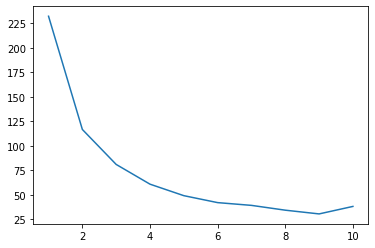

In [96]:
def get_mse(n_pca=2):
    pca = PCA(n_components=n_pca).fit(X_reg_scal)
    pcs = pca.fit_transform(X_reg_scal)
    X_PCR =  pcs.copy()
    V = pca.components_.T
    ols = sm.OLS(endog = y_reg_scal, exog = sm.add_constant(X_PCR)).fit()
    return ols.mse_model
plt.plot(np.arange(1, 11),list(map(get_mse, np.arange(1, 11))));

In [97]:
def get_coefs(n_pca=2):
    pca = PCA(n_components=n_pca).fit(X_reg_scal)
    pcs = pca.fit_transform(X_reg_scal)
    X_PCR =  pcs.copy()
    V = pca.components_.T
    ols = sm.OLS(endog = y_reg_scal, exog = sm.add_constant(X_PCR)).fit()
    beta_Z = ols.params[1:]
    beta_X = V @ beta_Z
    coefs = pd.DataFrame(index = X_reg.columns, data = beta_X)
    coefs.columns = ['coefs_PCR_' + str(n_pca)]
    return coefs
get_coefs(3)
from functools import reduce
dfs = [get_coefs(i) for i in range(1, 11)]
df_final = reduce(lambda left,right: left.join(right), dfs)
df_final

,coefs_PCR_1,coefs_PCR_2,coefs_PCR_3,coefs_PCR_4,coefs_PCR_5,coefs_PCR_6,coefs_PCR_7,coefs_PCR_8,coefs_PCR_9,coefs_PCR_10
Income,0.248903,0.250139,0.255049,0.255051,0.252950,0.255940,0.246062,0.246375,0.246618,-0.598867
Limit,0.269159,0.269904,0.273498,0.271959,0.273744,0.281698,0.288353,0.287639,0.287802,0.671407
Rating,0.269351,0.269989,0.270672,0.269459,0.271730,0.278110,0.293334,0.292667,0.292748,0.670638
Cards,0.008762,0.008398,-0.062288,-0.053340,-0.047782,-0.084639,0.101643,0.100669,0.100587,0.040431
Age,0.056364,0.053336,0.037519,0.053267,0.031285,-0.044677,-0.131355,-0.127669,-0.126926,-0.023274
Education,-0.012302,-0.008190,0.061966,0.055418,0.011903,-0.040486,0.011726,0.007994,0.008328,-0.005999
Gender_Female,0.001157,0.003405,0.052695,0.054079,0.109742,0.042864,0.018200,0.016169,0.015949,-0.011647
Student_Yes,-0.001045,0.004295,0.095588,0.105336,0.109718,0.136061,0.239457,0.244222,0.243888,0.276355
Married_Yes,0.012036,0.016050,-0.002502,-0.026812,-0.023194,-0.065397,-0.032594,-0.027802,-0.029607,-0.011161
Ethnicity_Asian,-0.015043,0.014623,-0.000976,-0.001196,0.000390,0.002062,-0.008416,-0.008253,0.002466,0.017409


## PLS - partial least squares (частный МНК)

PCR предполагает регрессию зависимой переменной на компоненты, которые получены из задачи обучения без учителя.
PLS, в свою очередь, определяет новые переменные, используя зависимость изначальных факторов с целевым показателем.
PLS помогает найти те направления, которые помогают объяснить как целевой фактор, так и объясняющие переменные.

Алгоритм PLS выглядит примерно следующим образом.

1. Первая компонента $Z_1$ находится по формуле $Z_1 = \sum_{j=1}^p corr_{j1}^2 X_j$. 

2. На втором шаге мы корректируем все факторы по $Z_1$ - строим регрессии каждой переменной на $Z_1$ и находим остатки. Как мы помним, остатки - это необъясненная доля дисперсии целевой переменной. В нашем случае это будет необъясненная доля дисперсии первой компонентой. 

3. Аналогично, как и на первом шаге, для каждой компоненты считаем веса, только вместо $X_1$ будут их остатки от объяснения предыдущих компонент.

4. Оцениваем зависимую переменную на полученные компоненты.

In [105]:
# PLS
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=2)
pls.fit(X_reg_scal, y_reg_scal)
print(f"PLS r-squared with 2 components: {pls.score(X_reg_scal, y_reg_scal):.3f}")

PLS r-squared with 2 components: 0.955


In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_reg_scal, y_reg_scal)
print(f"PCR r-squared with 2 components {pca_2.score(X_reg_scal, y_reg_scal):.3f}")


PCR r-squared with 2 components 0.584
